In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
sampling_rate = 64
time = np.arange(-1, 2, 1/sampling_rate)
points = len(time)

stretch = 3
shift = 0

hz = np.linspace(0, sampling_rate/2, int(np.floor(points/2)+1))

In [3]:
noise = stretch * np.random.randn(points) + shift

In [51]:
def plot_signal(signal):
    
    ax1= plt.subplot(211)
    ax1.plot(time, signal, 'b')
    ax1.set_title('Normally distributed: Time domain')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')

    ax2 = plt.subplot(223)
    y, x = np.histogram(signal, bins=100)
    ax2.plot(x[1:], y, 'k')
    ax2.set_title('Signal histogram (distribution)')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('N per bin')

    ax3 = plt.subplot(224)
    amp = np.abs(np.fft.fft(noise)/points)
    amp[2:] = 2*amp[2:]
    ax3.plot(hz, amp[:len(hz)], 'r')
    ax3.set_title('Frequency domain')
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_ylabel('Amplitude')

    plt.show()


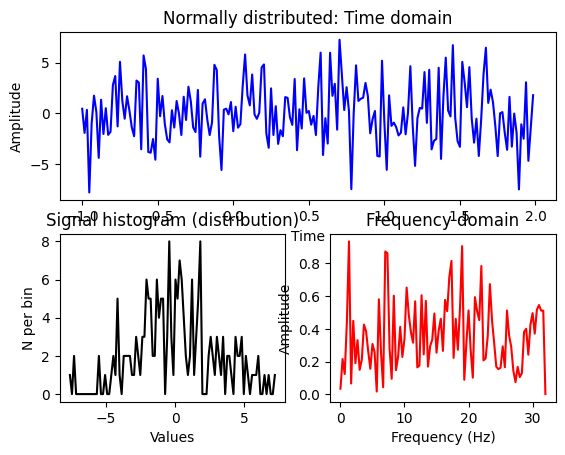

In [52]:
plot_signal(noise)

In [85]:
ed = 50
ps = np.random.rand(points) * np.exp(-np.arange(0, points) / ed)
# Inverted Fourier transform
fourier_coef = ps * np.exp(2 * np.pi * 1j * np.random.rand(len(ps)))

noise = np.real(np.fft.ifftn(fourier_coef)) 

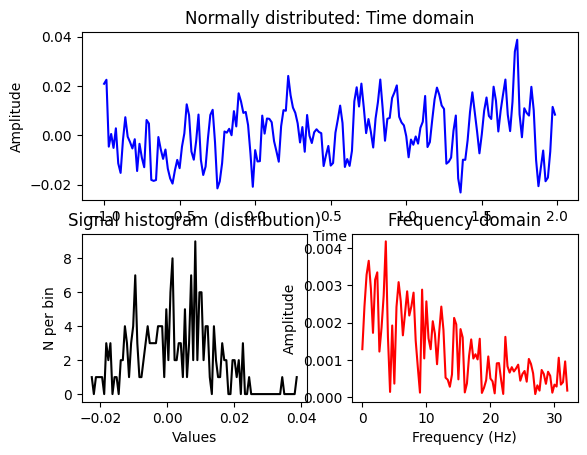

In [86]:
plot_signal(noise)